In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Missing values summary:
LB: 21
AC: 20
FM: 0
UC: 0
DL: 0
DS: 21
DP: 21
ASTV: 0
MSTV: 0
ALTV: 0
MLTV: 21
Width: 21
Tendency: 21
NSP: 21
Data types:
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


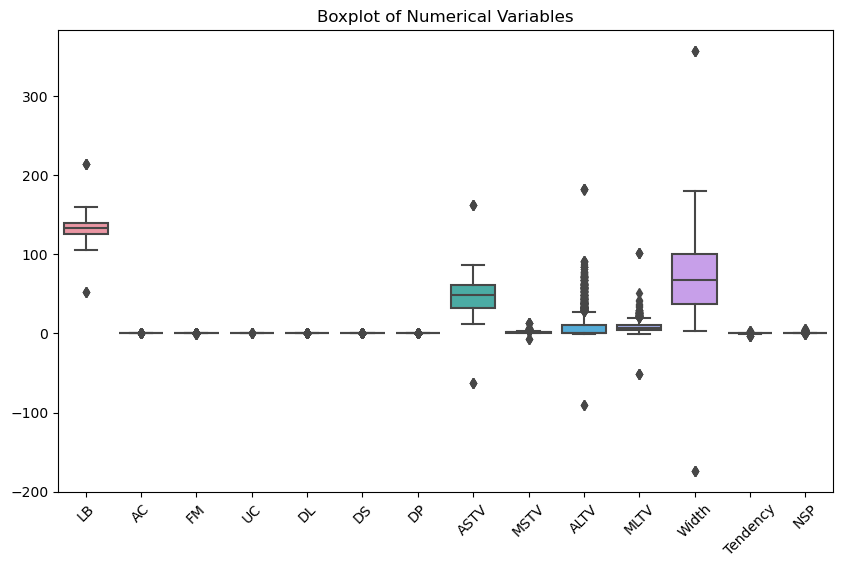

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

<Figure size 1200x800 with 0 Axes>

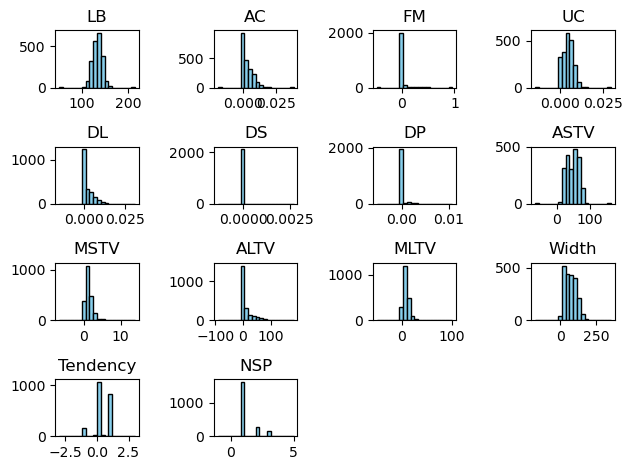

Error: 'Category' column not found or not a string type. Skipping countplot.


<Figure size 1000x600 with 0 Axes>

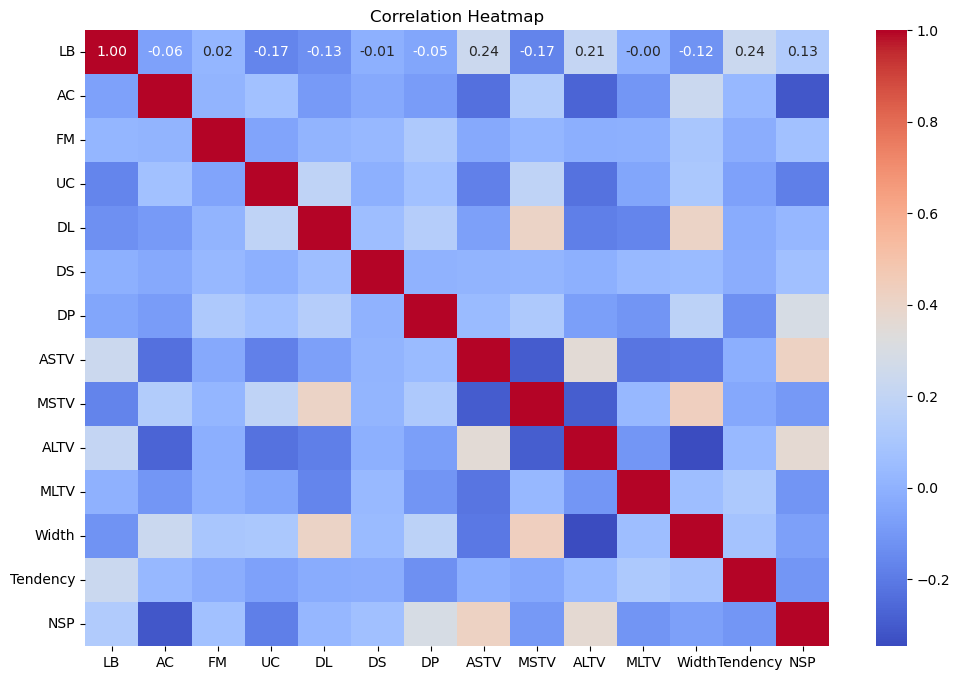

In [8]:
# Load the CSV assuming the path is correct
df = pd.read_csv("C:\kirti\eda1final.csv")

# Data Cleaning and Preparation

# 1. Handle missing values (consider data characteristics)
print("Missing values summary:")
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")  # Check missing values per column

# Choose an appropriate imputation strategy based on data types
def impute_numerical(col):
    return df[col].fillna(df[col].mean())

def impute_categorical(col):
    return df[col].fillna(df[col].mode()[0])

# Apply imputation based on data types (handle potential errors)
for col in df.columns:
    try:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = impute_numerical(col)
        else:
            df[col] = impute_categorical(col)
    except:
        pass  # Skip columns that cannot be converted

# 2. Identify and correct data type inconsistencies
print("Data types:")
print(df.dtypes)  # Display data types

# Convert columns to desired types if necessary (handle potential errors)
for col in df.columns:
    try:
        if pd.api.types.is_string_dtype(df[col]):
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Handle conversion errors
    except:
        pass  # Skip columns that cannot be converted

# 3. Detect and treat outliers (optional)
# Use techniques like IQR, z-scores, or boxplots to identify outliers
# Consider winsorization, clipping, or removal based on domain knowledge
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Variables')
plt.show()

# Statistical Summary
summary = df.describe()
print(summary)

# Data Visualization

plt.figure(figsize=(12, 8))
df.hist(bins=20, color='skyblue', edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
# Check if "Category" column exists and is string type
if 'Category' in df.columns and pd.api.types.is_string_dtype(df['Category']):
  sns.countplot(data=df, x='Category', palette='Set2')
  plt.title('Frequency of Categories')
  plt.xlabel('Category')
  plt.ylabel('Count')
  plt.show()
else:
  print("Error: 'Category' column not found or not a string type. Skipping countplot.")

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pattern Recognition and Insights:
# Identify any correlations between variables and discuss their potential implications

# Conclusion:
# Summarize key insights and patterns discovered through your exploratory analysis
# Discuss how these findings could impact decision-making or further analyses